# Citi Bike Data Wrangling and Exploratory Data Analysis

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the Dataset

In [2]:
#Importing "CitiBike Trip data" 

df = pd.read_csv("C:\\Users\\91988\\Downloads\\citibike-tripdata.csv")

In [3]:
#Using pandas "head()" function to display first five rows of the dataset

df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,410,2017-10-01 00:03:08,2017-10-01 00:09:59,3213,Van Vorst Park,40.718489,-74.047727,3192,Liberty Light Rail,40.711242,-74.055701,26187,Subscriber,1976.0,1
1,412,2017-10-01 00:03:13,2017-10-01 00:10:06,3213,Van Vorst Park,40.718489,-74.047727,3192,Liberty Light Rail,40.711242,-74.055701,31768,Subscriber,1975.0,2
2,274,2017-10-01 00:24:07,2017-10-01 00:28:42,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,26311,Subscriber,1979.0,1
3,2198,2017-10-01 00:31:03,2017-10-01 01:07:42,3199,Newport Pkwy,40.728745,-74.032108,3183,Exchange Place,40.716247,-74.033459,31709,Subscriber,1994.0,1
4,166,2017-10-01 00:34:09,2017-10-01 00:36:56,3186,Grove St PATH,40.719586,-74.043117,3213,Van Vorst Park,40.718489,-74.047727,31759,Subscriber,1967.0,2


In [4]:
#Using pandas "shape" function to know the dimensionality of the dataframe

df.shape

(34919, 15)

### Checking data type of all columns 

In [5]:
#Using pandas "dtypes" attribute to check data type of all columns in the given dataset

df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                 float64
gender                       int64
dtype: object

<span style="color:red">__Key Insights__</span>

<span style="color:blue">1. Tripduration is given in seconds, so for the visualization purpose this column needs to be transformed into float and time format.</span>

<span style="color:blue">2. There is a need to split starttime and stoptime columns into date and time columns.</span>

<span style="color:blue">3. We need to drop start and end station ids columns from the given dataset as we do not require them for further analysis.</span>

<span style="color:blue">4. Transformation is required in the birth year as the data is having float format instead of integer</span>

### Checking Missing Values 

In [6]:
#Using pandas "isnull" method to check null values in the dataset

df.isnull().sum()

tripduration                  0
starttime                     0
stoptime                      0
start station id              0
start station name            0
start station latitude        0
start station longitude       0
end station id                0
end station name              0
end station latitude          0
end station longitude         0
bikeid                        0
usertype                      0
birth year                 2158
gender                        0
dtype: int64


<span style="color:blue">From the above results, it can be seen that the birth year column is having 2158 missing values, thus these values should either be removed from the dataset or replaced with column's average value. 
Here, it is necessary to replace these null values so that no data is wasted. As a result, the null values in the birth year column will be replaced with the median or average value of the birth yearr column.</span>

### Dealing with Missing Values 

__Convert "NULL" to NaN__

<span style="color:blue">In the Citi Bike dataset, missing data in the birth year column comes with NULL word. Therefore, it is must to replace NULL with Python's default missing value marker, that is, NaN.</span>

In [7]:
#Using pandas "replace" function to replace NULL with NaN values

df.replace("NULL", np.nan, inplace = True)

__Calculating Average Value of the birth year column__

In [8]:
#Using pandas "mean" method to calculate the average value of birth year column

avg_birth_year = df["birth year"].astype("float").mean(axis=0)
print("Average of birth year column:", avg_birth_year)

Average of birth year column: 1980.1390677940233


__To replace missing data in birth year column with average of the column__

In [9]:
#Using pandas "replace" function to replace null values with the average of birth year column
#Here there is a need to replace null values with 1980 value instead of actual mean as birth year cannot be in float or decimal

df["birth year"].replace(np.nan, 1980, inplace = True)

__Checking missing values in birth year column after replacing null values with the average of the column__

In [10]:
#Using pandas "isnull" attribute to check presense of null of values

df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

<span style="color:blue">It can be seen that there are no missing values in the dataset after replacing null values with the mean of the column.</span>

### Dropping columns that are not required for further analysis

In [11]:
#Using pandas "drop" method to get rid of "start station id" and "stop station id" columns

df.drop(["start station id", "end station id"], axis = 1, inplace = True)


#Displaying last five rows of the dataset after dropping start station id and end station id columns

df.tail()

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
34914,645,2017-10-31 23:30:45,2017-10-31 23:41:30,Harborside,40.719252,-74.034234,Harborside,40.719252,-74.034234,18533,Subscriber,1991.0,1
34915,512,2017-10-31 23:32:49,2017-10-31 23:41:21,Dey St,40.737711,-74.066921,Pershing Field,40.742677,-74.051789,29623,Subscriber,1978.0,1
34916,320,2017-10-31 23:48:53,2017-10-31 23:54:13,Brunswick & 6th,40.726012,-74.050389,City Hall,40.717733,-74.043845,29655,Subscriber,1985.0,1
34917,327,2017-10-31 23:49:16,2017-10-31 23:54:43,Hilltop,40.731169,-74.057574,Christ Hospital,40.734786,-74.050444,31866,Subscriber,1995.0,1
34918,152,2017-10-31 23:50:04,2017-10-31 23:52:36,Pershing Field,40.742677,-74.051789,Leonard Gordon Park,40.745910,-74.057271,29623,Subscriber,1978.0,1


In [12]:
df.shape

(34919, 13)

<span style="color:blue">After removing two columns from the dataset, the data frame now has 13 columns.</span>

### Data Formatting

In [13]:
#Using pandas "astype()" attribute to change the format of "birth year" column from float to integer

df[["birth year"]] = df[["birth year"]].astype("int")

In [14]:
#Using pandas "dtypes" function to check data type of birth year column

birth_year_datatype = df.dtypes["birth year"]
print("The Data Type of Birth Year column is ", birth_year_datatype)

The Data Type of Birth Year column is  int32


__Start Time and Stop Time__

In [15]:
#Using pandas "to_datetime" method to change the format of "stattime & stoptime" columns from object to datetime

df.starttime = pd.to_datetime(df.starttime, infer_datetime_format=True)
df.stoptime = pd.to_datetime(df.stoptime, infer_datetime_format=True)

__Checking the changes made in the dataframe__

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34919 entries, 0 to 34918
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tripduration             34919 non-null  int64         
 1   starttime                34919 non-null  datetime64[ns]
 2   stoptime                 34919 non-null  datetime64[ns]
 3   start station name       34919 non-null  object        
 4   start station latitude   34919 non-null  float64       
 5   start station longitude  34919 non-null  float64       
 6   end station name         34919 non-null  object        
 7   end station latitude     34919 non-null  float64       
 8   end station longitude    34919 non-null  float64       
 9   bikeid                   34919 non-null  int64         
 10  usertype                 34919 non-null  object        
 11  birth year               34919 non-null  int32         
 12  gender                   34919 n

<span style="color:blue">It can be seen that the data format of birth year, starttime, stoptime is now converted into integer and datetime format</span>

### Data Transformation 

__tripduration__ 

<span style="color:blue">The values in trip duration column are given in seconds which needs to converted into appropriate time format, that is, hours, minutes and seconds</span>

In [17]:
#Transforming the data values of trip duration column to relevant time format and assigning the change to a new column

df['Trip Duration']=(df.tripduration//3600).astype(str)+':'+(df.tripduration%3600//60).astype(str)+':'+(df.tripduration%60).astype(str)

#Displaying the first five rows of new Trip Duration column

df["Trip Duration"].head()

0     0:6:50
1     0:6:52
2     0:4:34
3    0:36:38
4     0:2:46
Name: Trip Duration, dtype: object

<span style="color:blue">The output of the code shows that the data of tripduration column is now transformed into time format</span>

__Splitting Start Time and Stop Time columns into Start Date, Start Time, Stop Date and Stop Time__

In [18]:
df['Start Date'] = df.starttime.dt.date
df['Stop Date'] = df.stoptime.dt.date
df['Start Time'] = df.starttime.dt.time
df['Stop Time'] = df.stoptime.dt.time

df[["Start Date", "Start Time", "Stop Date", "Stop Time"]].head()

,Start Date,Start Time,Stop Date,Stop Time
0,2017-10-01,00:03:08,2017-10-01,00:09:59
1,2017-10-01,00:03:13,2017-10-01,00:10:06
2,2017-10-01,00:24:07,2017-10-01,00:28:42
3,2017-10-01,00:31:03,2017-10-01,01:07:42
4,2017-10-01,00:34:09,2017-10-01,00:36:56


__Creating a new column for gender which displays the categorical data of gender__

In [19]:
df['Gender'] = df.gender.replace([0,1,2],['Unknown','Male', 'Female'])

#Using pandas "unique" method of get distinctive values of gender column

df["Gender"].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

### Dropping starttime and stoptime columns from the dataset 

In [20]:
#Using pandas "drop" function to drop starttime and stoptime columns from dataset as they are not required for further analysis

df.drop(["starttime", "stoptime"], axis=  1, inplace= True)

In [21]:
#Adding new column to the dataset for showing the age of bike riders

now = 2017  #2017 year is assigned to now because we are doing analysis for the year 2017 
df["Age"] = now - df["birth year"]

In [22]:
#Displaying the first five rows value for Age column

df["Age"].head()

0    41
1    42
2    38
3    23
4    50
Name: Age, dtype: int32

In [23]:
#Showing the list of all columns in the dataset after dropping starttime and stoptime columns and introducing Age column
df.columns

Index(['tripduration', 'start station name', 'start station latitude',
       'start station longitude', 'end station name', 'end station latitude',
       'end station longitude', 'bikeid', 'usertype', 'birth year', 'gender',
       'Trip Duration', 'Start Date', 'Stop Date', 'Start Time', 'Stop Time',
       'Gender', 'Age'],
      dtype='object')

## Exploratory Data Analysis 

### Correlation

In [24]:
#Using pandas "corr" function to check the correlation among variables

dfcorr = df.corr()
dfcorr

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,bikeid,birth year,gender,Age
tripduration,1.000000,0.001399,-0.022067,-0.000051,-0.000046,-0.006536,-0.002551,-0.028337,0.002551
start station latitude,0.001399,1.000000,-0.263281,-0.003300,0.004563,-0.017405,-0.014482,0.018191,0.014482
start station longitude,-0.022067,-0.263281,1.000000,-0.007987,0.008929,0.006497,0.019653,-0.007549,-0.019653
end station latitude,-0.000051,-0.003300,-0.007987,1.000000,-0.999982,0.000225,-0.006893,-0.006672,0.006893
end station longitude,-0.000046,0.004563,0.008929,-0.999982,1.000000,-0.000331,0.006908,0.006834,-0.006908
bikeid,-0.006536,-0.017405,0.006497,0.000225,-0.000331,1.000000,-0.012016,-0.012623,0.012016
birth year,-0.002551,-0.014482,0.019653,-0.006893,0.006908,-0.012016,1.000000,0.049826,-1.000000
gender,-0.028337,0.018191,-0.007549,-0.006672,0.006834,-0.012623,0.049826,1.000000,-0.049826
Age,0.002551,0.014482,-0.019653,0.006893,-0.006908,0.012016,-1.000000,-0.049826,1.000000


### Correlation Visualization

<AxesSubplot:>

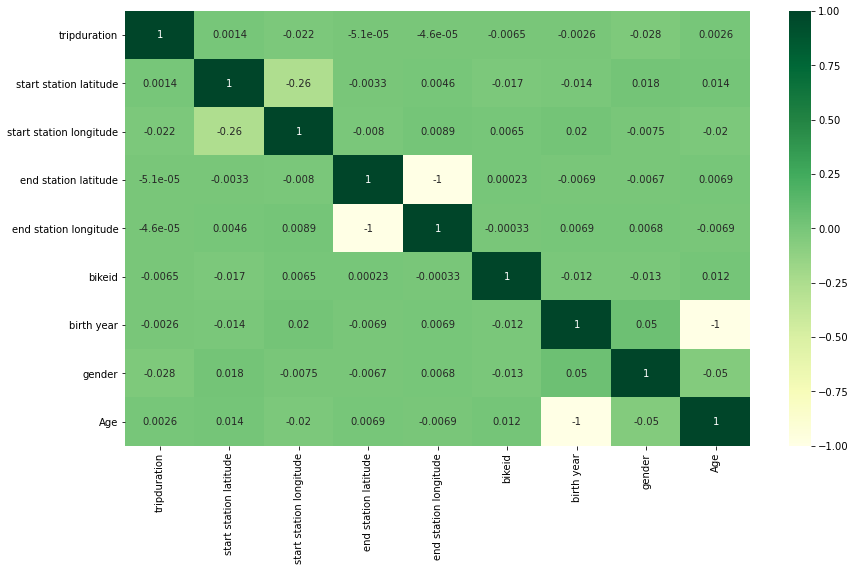

In [25]:
#Using seaborn's "heatmap" to visualize the correlation among variables 

plt.figure(figsize=(14,8))
sns.heatmap(dfcorr, annot = True, cmap = "YlGn")

<span style="color:blue">The above figure shows the correlation between different variables in the dataset. The darker the color, the stronger the positive correlation among variables, while the lightest color shows the strong negative correaltion. </span>

<span style = "color:blue"> It can be seen that, there is a strong negative correlation between end station longitude and end station latitude as their correlation value is -1, which shows the strong negative corrrelation. </span>

### Analyzing feature patterns using visualization

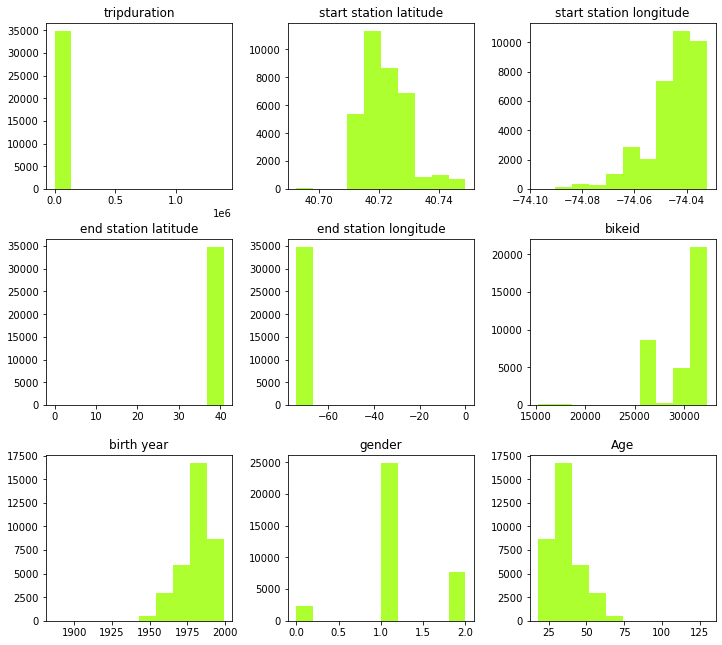

In [26]:
#Using matplotlib's "hist" function to visualize distribution of data for each column in the dataset

df.hist(figsize = (12,11), grid= False, color = "greenyellow")
plt.show()

<span style="color:blue">From the above graphs, it can be seen that data is evenly distributed to some extent in "Start Station latitude". </span>
    
<span style="color:blue"> In the case of "start station longitude" and "birth year" columns in the dataset, distribution is skewed to the left, while "Age" is skewed to the right</span>

### Exporting the Cleaned and Processed Dataset

In [28]:
df.to_csv("Citi Bike-Cleaned.csv")